In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

import wrangle_mall

In [2]:
from pydataset import data

# import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


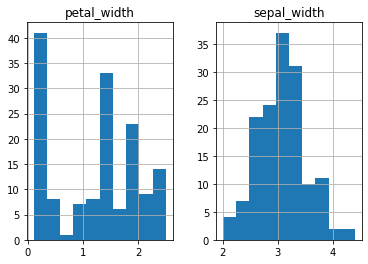

In [5]:
# look at distribution of sepal length and sepal_width

X.hist();

In [6]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head
X_scaled.head()


,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
97,5.7,2.9,4.2,1.3,versicolor,1
125,6.7,3.3,5.7,2.1,virginica,2
130,7.2,3.0,5.8,1.6,virginica,2
31,4.8,3.1,1.6,0.2,setosa,0
50,5.0,3.3,1.4,0.2,setosa,0
127,6.2,2.8,4.8,1.8,virginica,1
54,5.5,2.3,4.0,1.3,versicolor,1
124,6.3,2.7,4.9,1.8,virginica,1
147,6.3,2.5,5.0,1.9,virginica,1


### b. Visualize the results

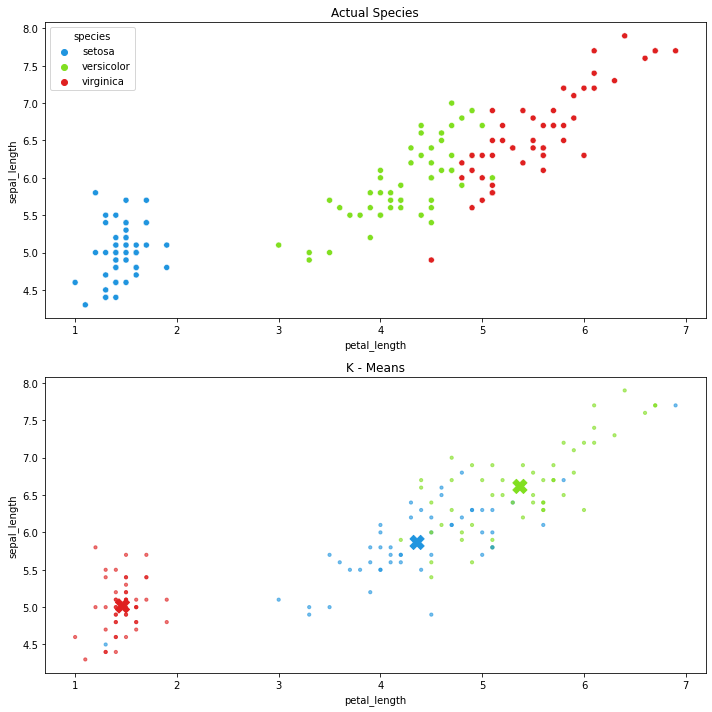

In [11]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

### Attributes for Kmeans :
- clustercenters: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [12]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.22991755, -1.00672719],
       [ 0.98166637,  0.11627194]])

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.229918,-1.006727
2,0.981666,0.116272


In [14]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,5.016327,1.465306
1,5.866000,4.360000
2,6.615686,5.370588


In [15]:
# Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[0.24489796, 3.45102041],
       [1.374     , 2.62      ],
       [1.94509804, 3.10784314]])

In [16]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

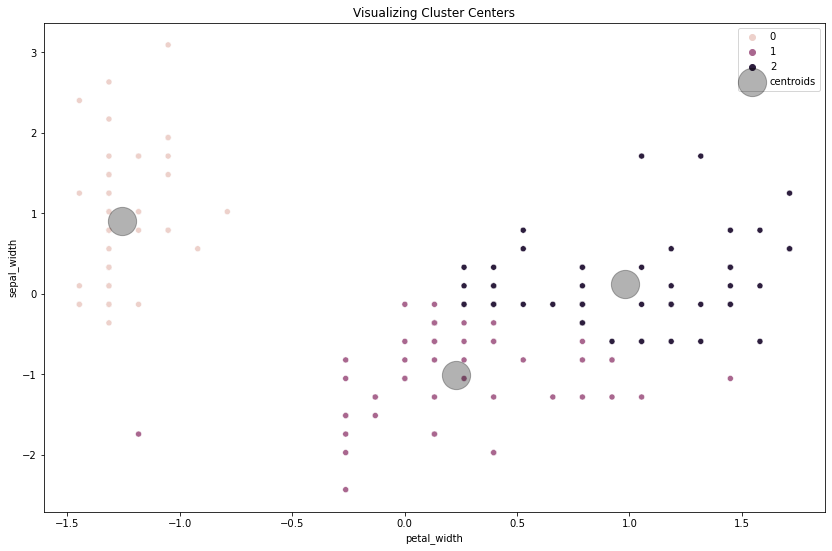

In [19]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k.

In [23]:
#what is the inertia of this cluster?
kmeans.inertia_

79.26009593454638

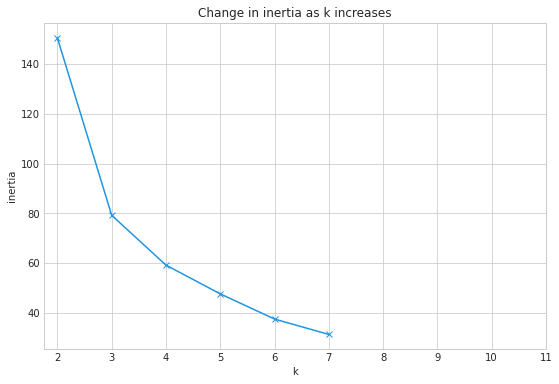

In [24]:
#visualize inertia vs k to select the best k:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 8)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### d. Repeat the clustering, this time with 3 different features.

In [25]:
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length', 'sepal_width']]

# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


In [26]:
# Cluster Centers

kmeans.cluster_centers_

array([[ 0.94857293,  1.08926809,  0.0406681 ],
       [ 0.29645938, -0.15389144, -0.94941289],
       [-1.30310821, -1.00206653,  0.90625492]])

In [27]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_length,sepal_length,sepal_width
0,0.948573,1.089268,0.040668
1,0.296459,-0.153891,-0.949413
2,-1.303108,-1.002067,0.906255


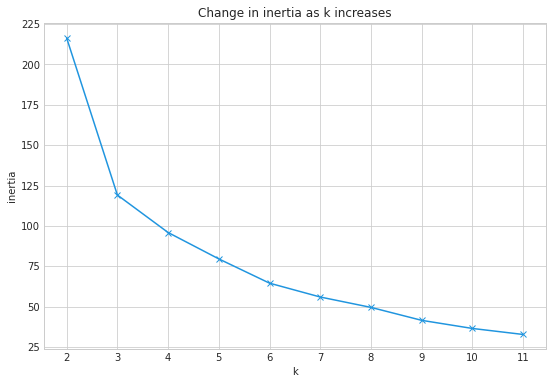

In [28]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

With three features, I would lean towards a k=3 as the elbow is a bit more prominent than it was with only 2 features, where I may have chosen a k=4.

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [30]:
df = wrangle_mall.get_mallcustomer_data()

In [32]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [36]:
# define independent variables for k-means

X = df[['annual_income', 'age']]
X.head()

,annual_income,age
customer_id,,
1,15,19
2,15,21
3,16,20
4,16,23
5,17,31


In [37]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [39]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

#check the returned dataframe
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,2
4,Female,23,16,77,2
5,Female,31,17,40,2


In [40]:
#Check on the scaled dataframe
X_scaled.head()

,annual_income,age,cluster
1,-1.738999,-1.424569,2
2,-1.738999,-1.281035,2
3,-1.700830,-1.352802,2
4,-1.700830,-1.137502,2
5,-1.662660,-0.563369,2


In [41]:
# View the centroids

kmeans.cluster_centers_

array([[ 0.37817285, -0.64671048],
       [-0.40624996,  1.21046483],
       [-1.17799735, -0.81371743],
       [ 1.47377619,  0.07022883]])

In [42]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,age
0,0.378173,-0.646710
1,-0.406250,1.210465
2,-1.177997,-0.813717
3,1.473776,0.070229


In [43]:
#Convert cluster type to a string for better viz with seaborn
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_2
2,Male,21,15,81,cluster_2
3,Female,20,16,6,cluster_2
4,Female,23,16,77,cluster_2
5,Female,31,17,40,cluster_2


Text(0.5, 1.0, 'Clusters of Mall Customer by Annual Income and Age (scaled)')

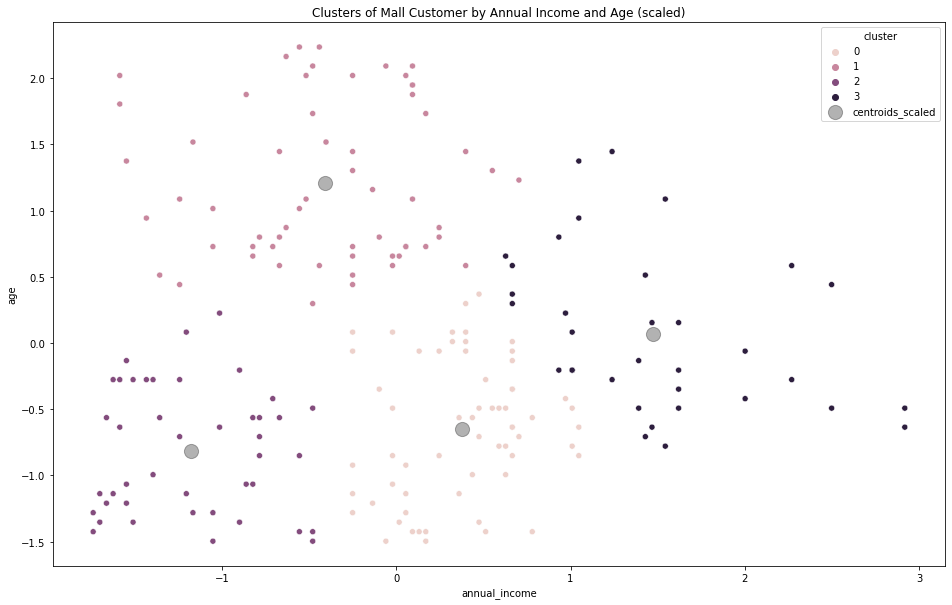

In [44]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='annual_income', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='annual_income', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Mall Customer by Annual Income and Age (scaled)')

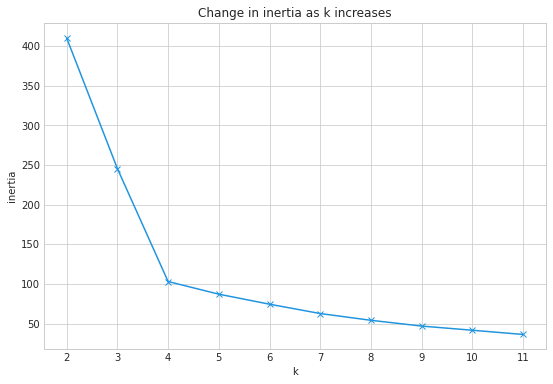

In [45]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [46]:
# Useful functions provided by Ravinder: 


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

#### Visualize Clusters on unscaled data

In [47]:
X = df[['spending_score', 'age']]


In [49]:
df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 4)

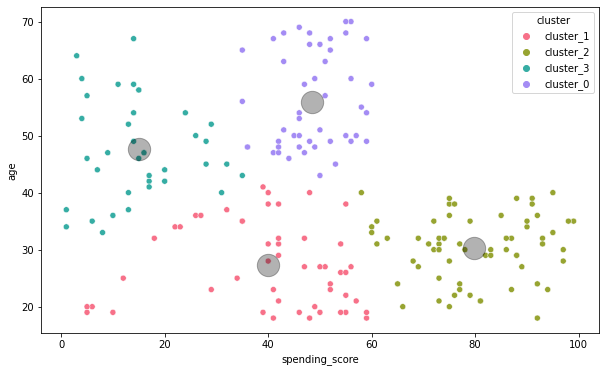

In [51]:
create_scatter_plot('spending_score','age',df, kmeans, X_scaled, scaler)

#### Visualize Clusters on Scaled Data

In [52]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster on X_scaled dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

#check the returned dataframe
X_scaled.head()

,spending_score,age,cluster
1,-0.434801,-1.424569,0
2,1.195704,-1.281035,3
3,-1.715913,-1.352802,0
4,1.040418,-1.137502,3
5,-0.395980,-0.563369,0


In [53]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,spending_score,age
0,-0.394427,-0.834647
1,-1.366519,0.628336
2,-0.065584,1.229272
3,1.149715,-0.614157


Text(0.5, 1.0, "Clusters of Mall Customers' Spending Score By Age (scaled)")

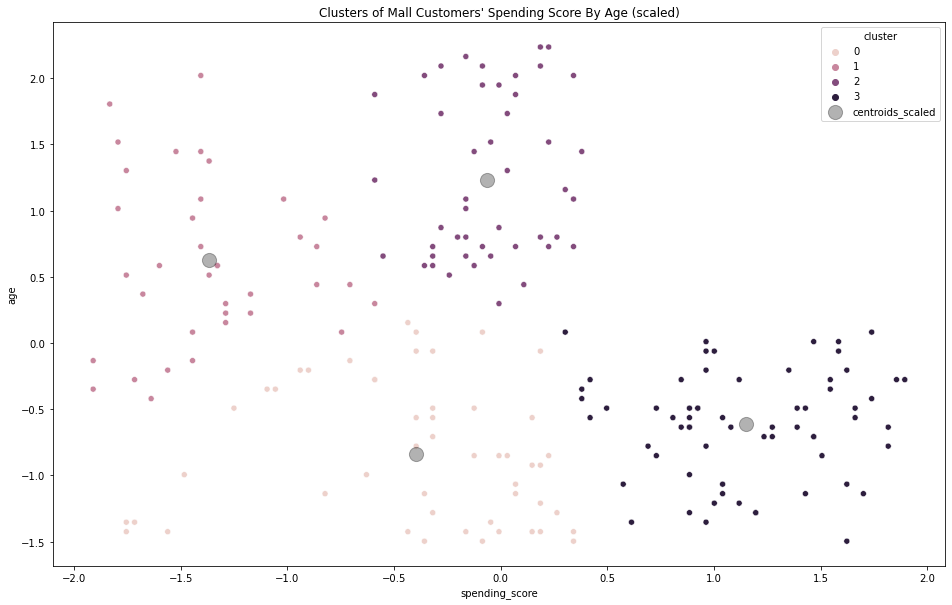

In [54]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='spending_score', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'spending_score', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title("Clusters of Mall Customers' Spending Score By Age (scaled)")

In [56]:
# Set k=4.  That's the elbow.
k = 4

[Text(0.5, 1.0, 'Unscaled Data with k= 4'),
 Text(0.5, 0, 'spending score'),
 Text(0, 0.5, 'age')]

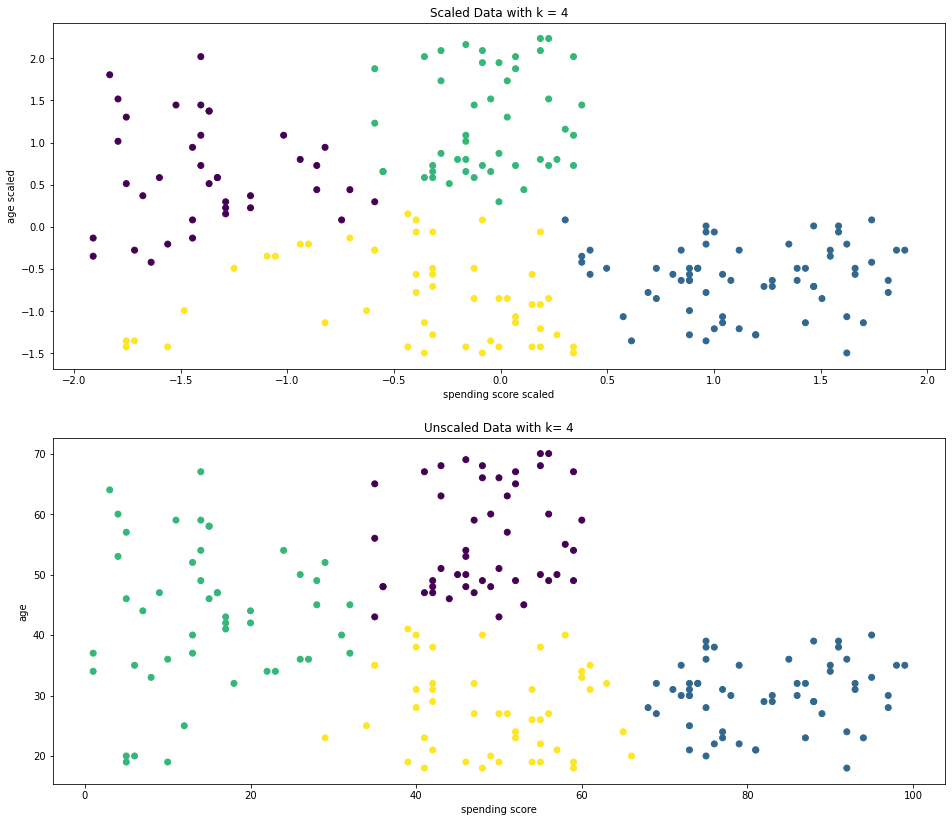

In [57]:
#Visualize scaled vs unscaled clustering in a subplot:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False, sharey=False)

#Plot the clusters based off scaled data
cluster1 = KMeans(k).fit(X_scaled).predict(X_scaled)
ax1.scatter(X_scaled.spending_score, X_scaled.age,c=cluster1)
ax1.set(title='Scaled Data with k = {}'.format(k), xlabel='spending score scaled', ylabel='age scaled')

#Plot the clusters based off unscaled data
cluster2 = KMeans(k).fit(X).predict(X)
ax2.scatter(df.spending_score, df.age, c=cluster2)
ax2.set(title='Unscaled Data with k= {}'.format(k), xlabel='spending score', ylabel='age')

- Why is there a difference in the clusters between scaled and unscaled data?
    - Clustering is a distance based algorithm
    - Distance between points in scaled data is smaller than distance between points in unscaled data...this changes the results of the clustering.
    - So, scaling is important when the units of measures between two variables are different / extreme

### 4. Bonus

In [65]:
sheet_id = '1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M'
sheet_name = 'sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [69]:
bonus = pd.read_csv(url)

In [70]:
bonus

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


In [71]:
X = bonus[['x', 'y']]

In [72]:
bonus, X_scaled, scaler, kmeans, centroids = create_cluster(bonus, X, 4)

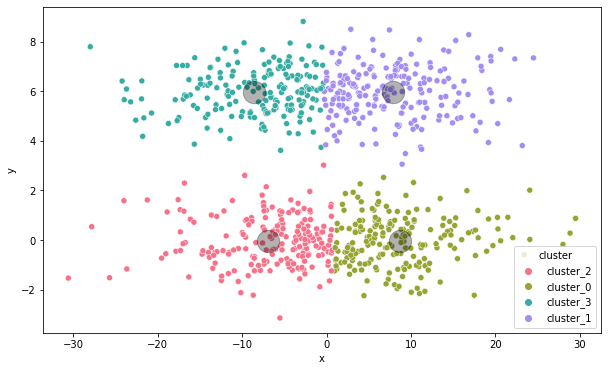

In [73]:
create_scatter_plot('x', 'y', bonus, kmeans, X_scaled, scaler)

In [74]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster on X_scaled dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

#check the returned dataframe
X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,2
1,-0.821099,-0.368472,2
2,-0.708466,-0.920978,2
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1


In [75]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,x,y
0,0.739239,0.949214
1,0.825694,-0.952092
2,-0.748910,-0.950150
3,-0.915295,0.953271


Text(0.5, 1.0, 'Bonus Exercise (scaled)')

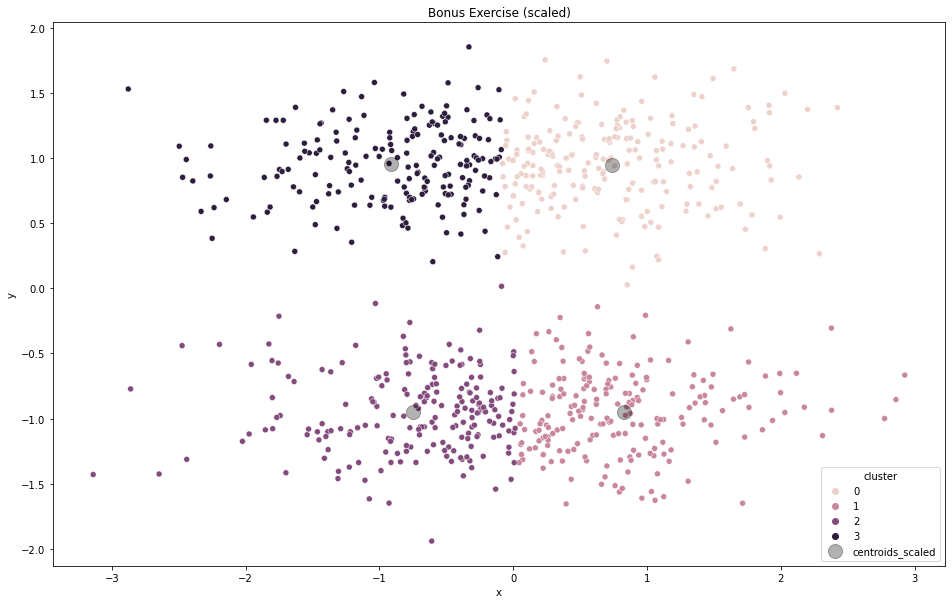

In [76]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='x', y='y', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'x', y='y', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title("Bonus Exercise (scaled)")

In [77]:
# Set k=4.  That's the elbow.
k = 4

[Text(0.5, 1.0, 'Unscaled Data with k= 4'),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y')]

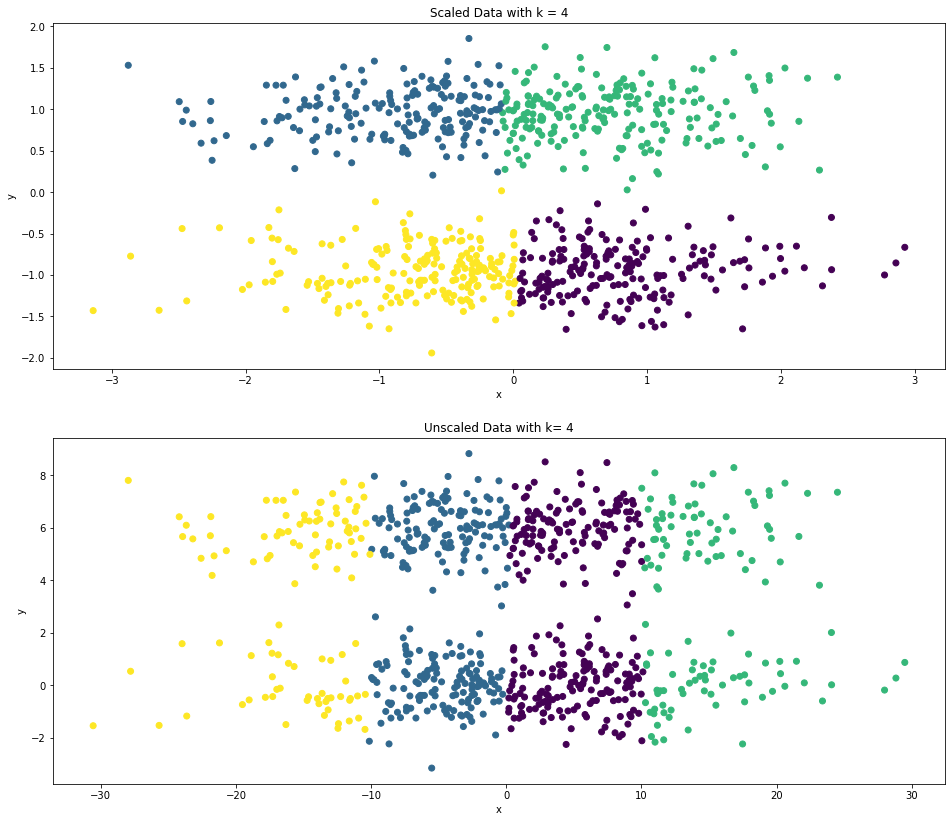

In [79]:
#Visualize scaled vs unscaled clustering in a subplot:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False, sharey=False)

#Plot the clusters based off scaled data
cluster1 = KMeans(k).fit(X_scaled).predict(X_scaled)
ax1.scatter(X_scaled.x, X_scaled.y,c=cluster1)
ax1.set(title='Scaled Data with k = {}'.format(k), xlabel='x', ylabel='y')

#Plot the clusters based off unscaled data
cluster2 = KMeans(k).fit(X).predict(X)
ax2.scatter(bonus.x, bonus.y, c=cluster2)
ax2.set(title='Unscaled Data with k= {}'.format(k), xlabel='x', ylabel='y')